In [1]:
import pickle 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [10]:
df_all_cp = pd.read_csv('/home/as5957/research_spring_2023/change_point_sims.csv',index_col=[0])
df_all_ncp = pd.read_csv('/home/as5957/research_spring_2023/nonchange_point_sims.csv',index_col=[0])


df_emotions_cp = pd.read_csv('/home/as5957/research_spring_2023/change_point_sims_emotions.csv',index_col=[0])
df_emotions_ncp = pd.read_csv('/home/as5957/research_spring_2023/nonchange_point_sims_emotions.csv',index_col=[0])

df_musc_cp = pd.read_csv('/home/as5957/research_spring_2023/change_point_sims_musc.csv',index_col=[0])
df_musc_ncp = pd.read_csv('/home/as5957/research_spring_2023/nonchange_point_sims_musc.csv',index_col=[0])

df_pose_cp = pd.read_csv('/home/as5957/research_spring_2023/change_point_sims_pose.csv',index_col=[0])
df_pose_ncp = pd.read_csv('/home/as5957/research_spring_2023/nonchange_point_sims_pose.csv',index_col=[0])

In [11]:
df_all_cp = df_all_cp.dropna()
df_all_ncp = df_all_ncp.dropna()

df_emotions_cp = df_emotions_cp.dropna()
df_emotions_ncp  = df_emotions_ncp .dropna()

df_musc_cp = df_musc_cp.dropna()
df_musc_ncp  = df_musc_ncp .dropna()

df_pose_cp = df_pose_cp.dropna()
df_pose_ncp  = df_pose_ncp .dropna()


In [12]:
df_pose_ncp.columns

Index(['file_id', 'time_stamp', 'sim1', 'sim2', 'sim3', 'label'], dtype='object')

In [26]:
def absolute_dif(df):
    return abs(df['sim3']-df['sim1'])

cp_all_diff = absolute_dif(df_all_cp)
ncp_all_diff = absolute_dif(df_all_ncp)

y_all = [cp_all_diff.mean(),ncp_all_diff.mean()]
x = ['change_point', 'non_change_point']

cp_emotion_diff = absolute_dif(df_emotions_cp)
ncp_emotion_diff = absolute_dif(df_emotions_ncp)

y_emotion = [cp_emotion_diff.mean(),ncp_emotion_diff.mean()]
x = ['change_point', 'non_change_point']

cp_musc_diff = absolute_dif(df_musc_cp)
ncp_musc_diff = absolute_dif(df_musc_ncp)

y_musc = [cp_musc_diff.mean(),ncp_musc_diff.mean()]
x = ['change_point', 'non_change_point']


cp_pose_diff = absolute_dif(df_pose_cp)
ncp_pose_diff = absolute_dif(df_pose_ncp)

y_pose = [cp_pose_diff.mean(),ncp_pose_diff.mean()]
x = ['change_point', 'non_change_point']

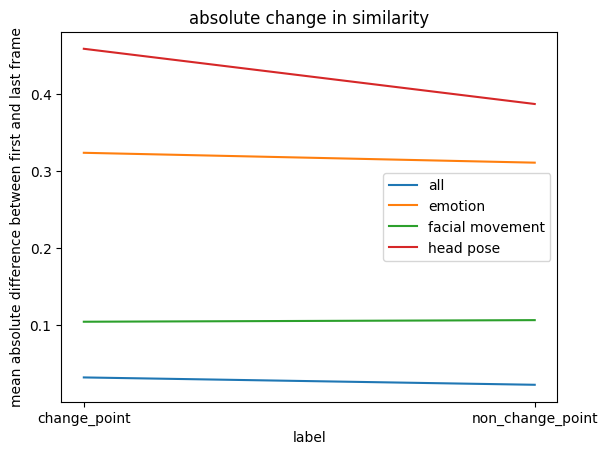

In [33]:
fig, ax = plt.subplots()

ax.plot(x, y_all)
ax.plot(x, y_emotion)
ax.plot(x, y_musc)
ax.plot(x, y_pose)
legend_drawn_flag = True
plt.legend(["all", "emotion","facial movement", "head pose"], loc=0, frameon=legend_drawn_flag)
plt.xlabel("label")
plt.ylabel("mean absolute difference between first and last frame")
plt.title("absolute change in similarity")
plt.show()

In [35]:
x = ['frame-5','frame_t','frame+5']

y_all_cp = [df_all_cp['sim1'].mean(),df_all_cp['sim2'].mean(),df_all_cp['sim3'].mean()]
y_all_ncp = [df_all_ncp['sim1'].mean(),df_all_ncp['sim2'].mean(),df_all_ncp['sim3'].mean()]

y_emotions_cp = [df_emotions_cp['sim1'].mean(),df_emotions_cp['sim2'].mean(),df_emotions_cp['sim3'].mean()]
y_emotions_ncp = [df_emotions_ncp['sim1'].mean(),df_emotions_ncp['sim2'].mean(),df_emotions_ncp['sim3'].mean()]

y_musc_cp = [df_musc_cp['sim1'].mean(),df_musc_cp['sim2'].mean(),df_musc_cp['sim3'].mean()]
y_musc_ncp = [df_musc_ncp['sim1'].mean(),df_musc_ncp['sim2'].mean(),df_musc_ncp['sim3'].mean()]

y_pose_cp = [df_pose_cp['sim1'].mean(),df_pose_cp['sim2'].mean(),df_pose_cp['sim3'].mean()]
y_pose_ncp = [df_pose_ncp['sim1'].mean(),df_pose_ncp['sim2'].mean(),df_pose_ncp['sim3'].mean()]


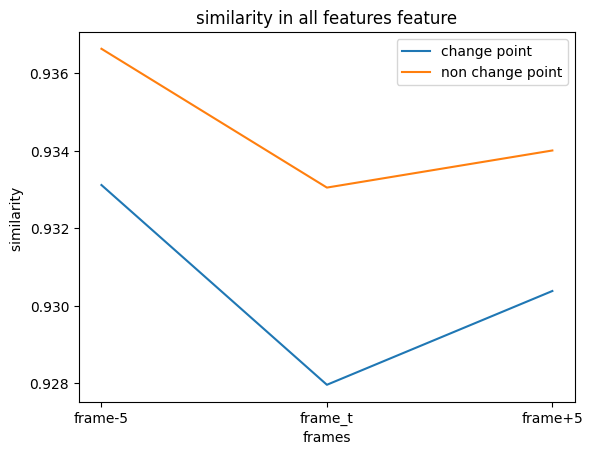

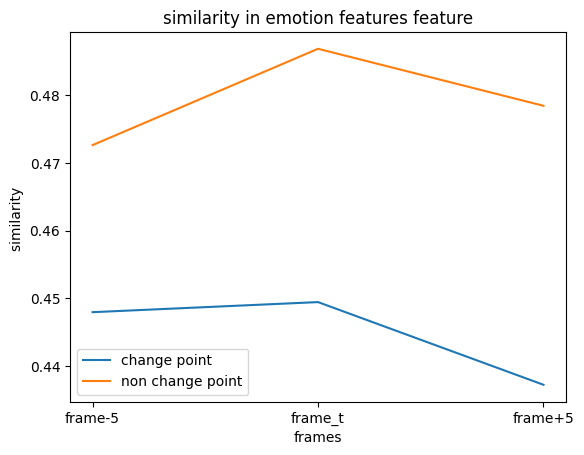

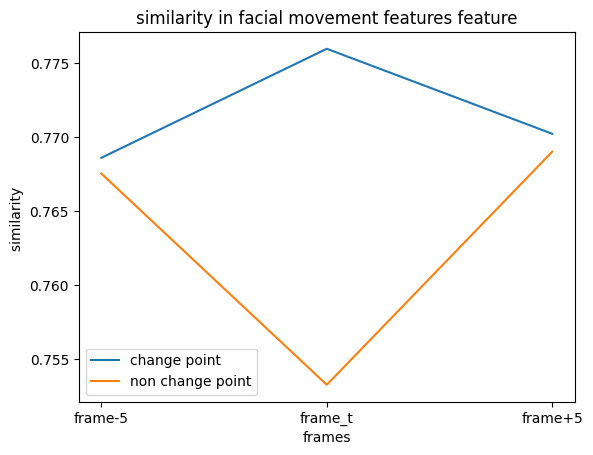

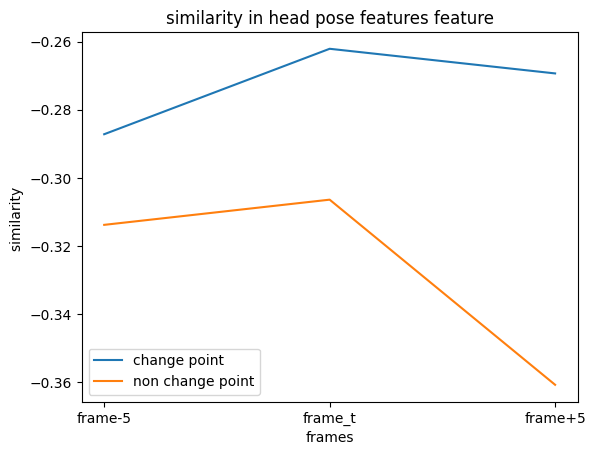

In [38]:
def gen_sim_plot(y1,y2,x,type):

    ig, ax = plt.subplots()
    ax.plot(x, y1)
    ax.plot(x,y2)
    legend_drawn_flag = True
    plt.legend(["change point", "non change point"], loc=0, frameon=legend_drawn_flag)
    plt.xlabel("frames")
    plt.ylabel("similarity ")
    title = "similarity in " + type +" feature"
    plt.title(title)
    plt.show()

gen_sim_plot(y_all_cp,y_all_ncp,x,'all features')

gen_sim_plot(y_emotions_cp,y_emotions_ncp,x,'emotion features')

gen_sim_plot(y_musc_cp,y_musc_ncp,x,'facial movement features')

gen_sim_plot(y_pose_cp,y_pose_ncp,x,'head pose features')



In [54]:
#train classifiers
df_all = pd.concat([df_all_cp,df_all_ncp])
df_emotions = pd.concat([df_emotions_cp,df_emotions_ncp])
df_musc = pd.concat([df_musc_cp,df_musc_ncp])
df_pose = pd.concat([df_pose_cp,df_pose_ncp])

# #shuffle data 
df_all = df_all.sample(frac = 1)
df_emotions = df_emotions.sample(frac = 1)
df_musc = df_musc.sample(frac = 1)
df_pose = df_pose.sample(frac = 1)

In [55]:
def split(df, percentage):
  df = df.sample(frac = 1) #shuffle
  index = int(percentage*len(df))
  train = df.iloc[:index,:]
  test = df.iloc[index:,:]

  return train, test 

train_all, test_all = split(df_all, 0.8)
train_emotions, test_emotions = split(df_emotions, 0.8)
train_musc, test_musc = split(df_musc, 0.8)
train_pose, test_pose = split(df_pose, 0.8)



In [56]:
train_all.columns

Index(['file_id', 'time_stamp', 'sim1', 'sim2', 'sim3', 'label'], dtype='object')

In [57]:
from sklearn.linear_model import LogisticRegression
y_train = train_all['label']
X_train = train_all.drop(['file_id', 'time_stamp','label'], axis=1)

y_test = test_all['label']
X_test = test_all.drop(['file_id', 'time_stamp','label'], axis = 1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [58]:
from sklearn.metrics import f1_score, accuracy_score
y_pred = clf.predict(X_test)
print("f1: ", f1_score(y_test, y_pred, average='macro'))
print("accuracy: ", accuracy_score(y_test, y_pred))

f1:  0.3333333333333333
accuracy:  0.5


In [59]:
y_train = train_emotions['label']
X_train = train_emotions.drop(['file_id', 'time_stamp','label'], axis=1)

y_test = test_emotions['label']
X_test = test_emotions.drop(['file_id', 'time_stamp','label'], axis = 1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("f1: ", f1_score(y_test, y_pred, average='macro'))
print("accuracy: ", accuracy_score(y_test, y_pred))

f1:  0.41727746781898406
accuracy:  0.5478723404255319


In [60]:
y_train = train_musc['label']
X_train = train_musc.drop(['file_id', 'time_stamp','label'], axis=1)

y_test = test_musc['label']
X_test = test_musc.drop(['file_id', 'time_stamp','label'], axis = 1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("f1: ", f1_score(y_test, y_pred, average='macro'))
print("accuracy: ", accuracy_score(y_test, y_pred))

f1:  0.35726495726495733
accuracy:  0.5319148936170213


In [61]:
y_train = train_pose['label']
X_train = train_pose.drop(['file_id', 'time_stamp','label'], axis=1)

y_test = test_pose['label']
X_test = test_pose.drop(['file_id', 'time_stamp','label'], axis = 1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("f1: ", f1_score(y_test, y_pred, average='macro'))
print("accuracy: ", accuracy_score(y_test, y_pred))

f1:  0.39606815203145473
accuracy:  0.5555555555555556


In [1]:
import pickle 
with open('/home/as5957/research_spring_2023/change_points_two.pkl', 'rb') as f:
    all_features = pickle.load(f)